<a href="https://colab.research.google.com/github/Hasifa1/Machine-learning-models/blob/main/Naivebayes_maleria_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/outbreak_detect.csv')

In [ ]:
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,NaN,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No


In [ ]:
df.tail()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
21,31.0,23.0,73.35,4.97,10659,612,Yes
22,30.0,23.0,86.81,7.21,9041,418,No
23,30.0,22.0,78.80,3.12,11265,404,Yes
24,33.0,22.0,73.71,1.75,9233,212,No
25,1.0,24.0,84.57,11.15,9693,482,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maxTemp      24 non-null     float64
 1   minTemp      25 non-null     float64
 2   avgHumidity  26 non-null     float64
 3   Rainfall     26 non-null     float64
 4   Positive     26 non-null     int64  
 5   pf           26 non-null     int64  
 6   Outbreak     25 non-null     object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.5+ KB


In [ ]:
df.describe()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf
count,24.000000,25.000000,26.000000,26.000000,26.000000,26.000000
mean,33.458333,23.960000,69.611538,7.035769,7951.307692,412.346154
std,8.203812,2.805946,15.378182,9.233042,3617.947006,217.488564
min,1.000000,18.000000,34.740000,0.000000,416.000000,26.000000
25%,31.000000,23.000000,57.915000,0.095000,5487.500000,213.000000
50%,33.500000,24.000000,73.290000,4.095000,9271.500000,414.000000
75%,36.750000,24.000000,84.245000,11.150000,10702.500000,532.250000
max,45.000000,32.000000,88.770000,41.400000,13154.000000,838.000000


In [ ]:
df.isnull().sum()

maxTemp        2
minTemp        1
avgHumidity    0
Rainfall       0
Positive       0
pf             0
Outbreak       1
dtype: int64

In [ ]:
import math
maxt=df['maxTemp'].mean()

In [ ]:
maxt=math.floor(maxt)

In [ ]:
df['maxTemp']=df['maxTemp'].fillna(maxt)

In [ ]:
mint=df['minTemp'].mean()

In [ ]:
mint=math.floor(mint)

In [ ]:
df['minTemp']=df['minTemp'].fillna(mint)

In [ ]:
df.isnull().sum()

maxTemp        0
minTemp        0
avgHumidity    0
Rainfall       0
Positive       0
pf             0
Outbreak       1
dtype: int64

In [ ]:
df.tail()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
20,36.0,26.0,72.78,3.54,5138,213,No
21,31.0,23.0,73.35,4.97,10659,612,Yes
22,30.0,23.0,86.81,7.21,9041,418,No
23,30.0,22.0,78.80,3.12,11265,404,Yes
24,33.0,22.0,73.71,1.75,9233,212,No


In [ ]:
df=df.drop(25,axis=0)

KeyError: ignored

In [ ]:
#data preprocessing
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
#fitting the technique to dataset
df.Gender=LE.fit_transform(df.Outbreak)

<ipython-input-22-ac4d4e667201>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Gender=LE.fit_transform(df.Outbreak)


In [ ]:
df.tail()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
20,36.0,26.0,72.78,3.54,5138,213,No
21,31.0,23.0,73.35,4.97,10659,612,Yes
22,30.0,23.0,86.81,7.21,9041,418,No
23,30.0,22.0,78.80,3.12,11265,404,Yes
24,33.0,22.0,73.71,1.75,9233,212,No


In [ ]:
#X -Independent variables
#Y- Dependent variable  -output
#for feeding ml model we need to feed 2D only
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1:].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
#normalize
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)#normalizing
X_test=sst.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
accuracy=model.score(X_test,Y_test)
print(accuracy)

0.875


In [ ]:
train_accuracy=model.score(X_train,Y_train)
print(train_accuracy)

0.8823529411764706


In [33]:
cc=model.score(sst.transform(X),Y)
print(cc)

0.88


In [36]:
import pandas as pd

In [38]:
matrix=df.corr()

In [40]:
matrix

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf
maxTemp,1.000000,0.359554,-0.516852,-0.264541,-0.325488,-0.209560
minTemp,0.359554,1.000000,-0.158894,-0.013401,0.022919,0.112464
avgHumidity,-0.516852,-0.158894,1.000000,0.607764,0.627229,0.455481
Rainfall,-0.264541,-0.013401,0.607764,1.000000,0.292256,0.294527
Positive,-0.325488,0.022919,0.627229,0.292256,1.000000,0.881520
pf,-0.209560,0.112464,0.455481,0.294527,0.881520,1.000000


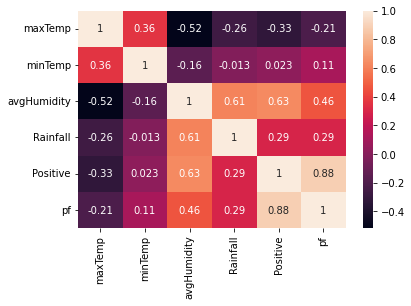

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matrix,annot=True)
plt.show()